In [47]:
import yfinance as yf

In [99]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [100]:
stock = "AAPL"
apple_data = yf.download(stock, start, end, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [101]:
apple_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2005-07-08,1.149572,1.366071,1.367143,1.338214,1.352500,290735200
2005-07-11,1.145064,1.360714,1.380357,1.349286,1.370357,388788400
2005-07-12,1.149271,1.365714,1.371429,1.353929,1.365357,387038400
2005-07-13,1.152579,1.369643,1.375000,1.353571,1.367500,684835200
2005-07-14,1.224708,1.455357,1.500357,1.436786,1.456786,2096060400
2005-07-15,1.248752,1.483929,1.484643,1.445000,1.463214,687682800
2005-07-18,1.246949,1.481786,1.503571,1.477500,1.478929,586297600
2005-07-19,1.298041,1.542500,1.543929,1.466786,1.482857,671062000


In [102]:
apple_data.shape

(5030, 6)

In [103]:
apple_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,56.783902,58.682280,59.273443,58.032097,58.634672,3.662991e+08
std,67.739790,67.763599,68.434600,67.008611,67.686789,3.835498e+08
min,1.145064,1.360714,1.367143,1.338214,1.352500,2.323470e+07
25%,7.736548,9.193572,9.281875,9.095983,9.187053,9.430480e+07
50%,24.374111,26.993750,27.228750,26.710000,26.988750,2.029422e+08
75%,88.970448,91.526875,92.881876,90.824377,91.272499,5.292658e+08
max,258.396667,259.019989,260.100006,257.630005,258.190002,3.372970e+09


In [104]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2005-07-08 to 2025-07-07
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5030 non-null   float64
 1   (Close, AAPL)      5030 non-null   float64
 2   (High, AAPL)       5030 non-null   float64
 3   (Low, AAPL)        5030 non-null   float64
 4   (Open, AAPL)       5030 non-null   float64
 5   (Volume, AAPL)     5030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [105]:
apple_data.isna().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [106]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Closing price of Apple data')

<Figure size 1500x500 with 0 Axes>

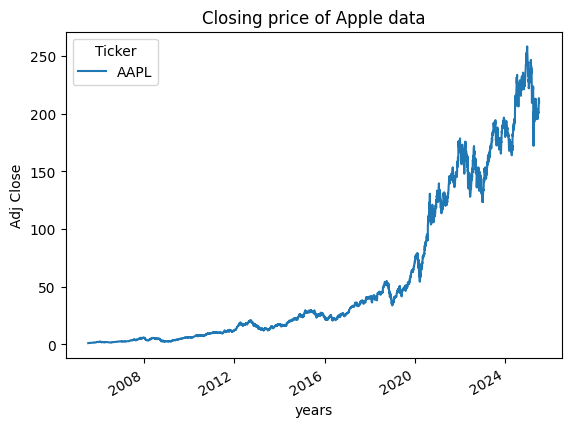

In [107]:
plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Apple data")

In [108]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple data")
    plt.tight_layout()

In [109]:
apple_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

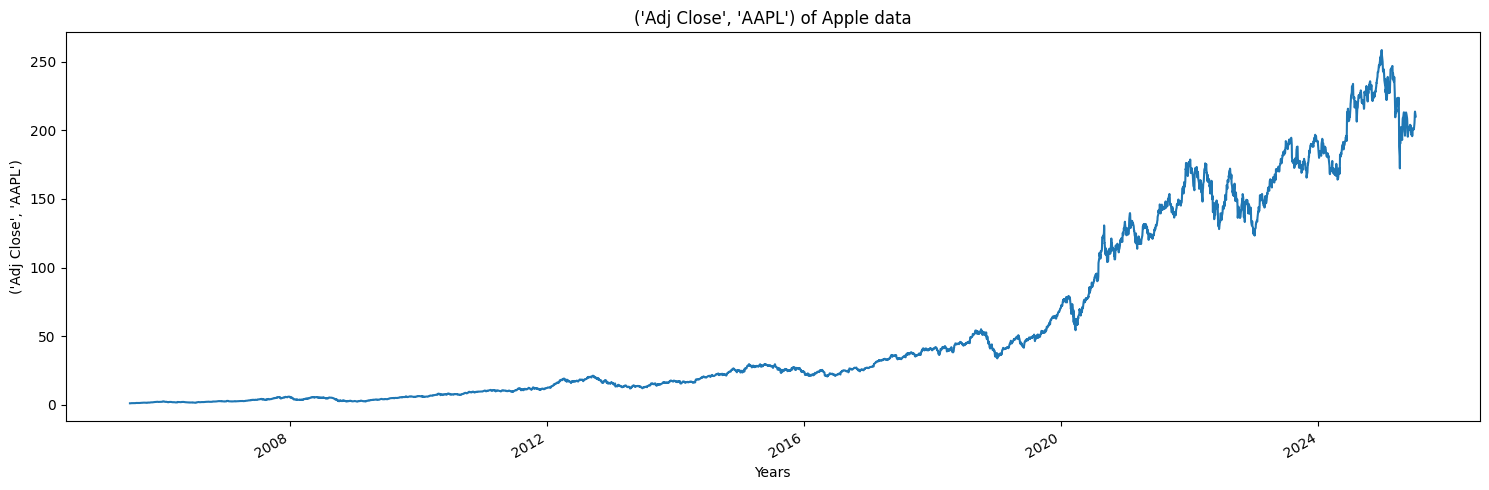

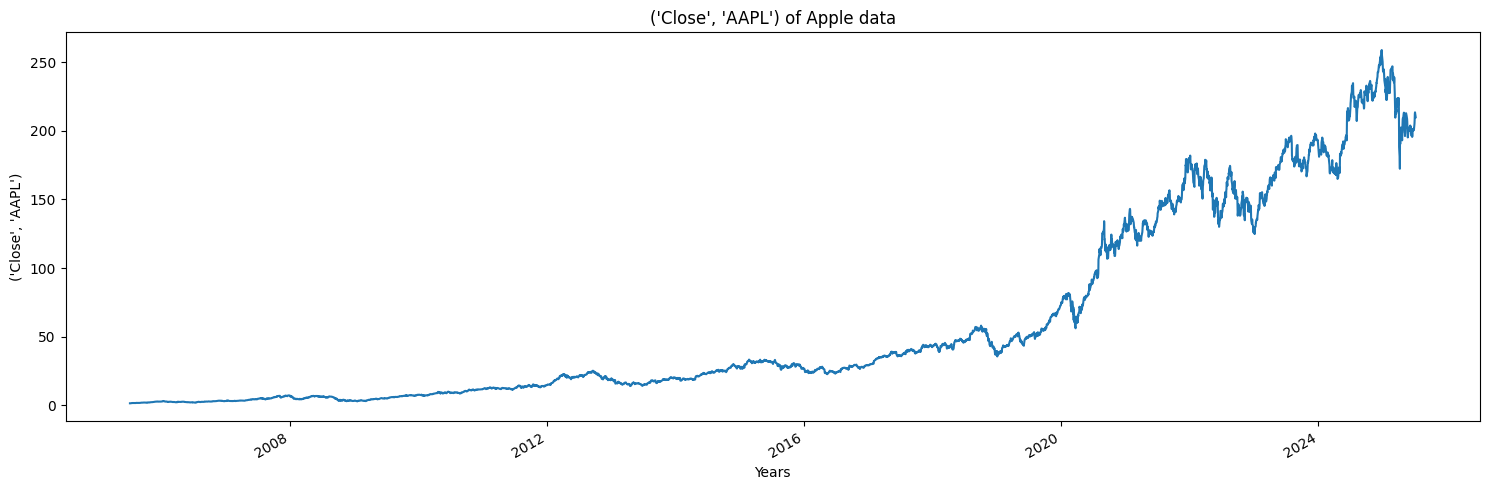

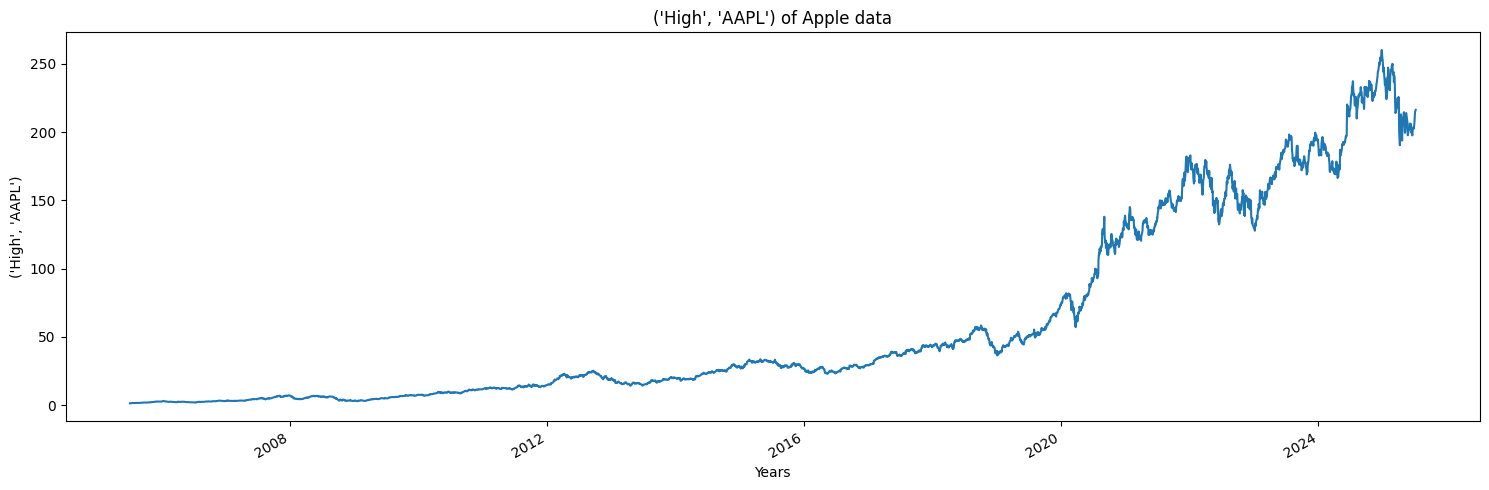

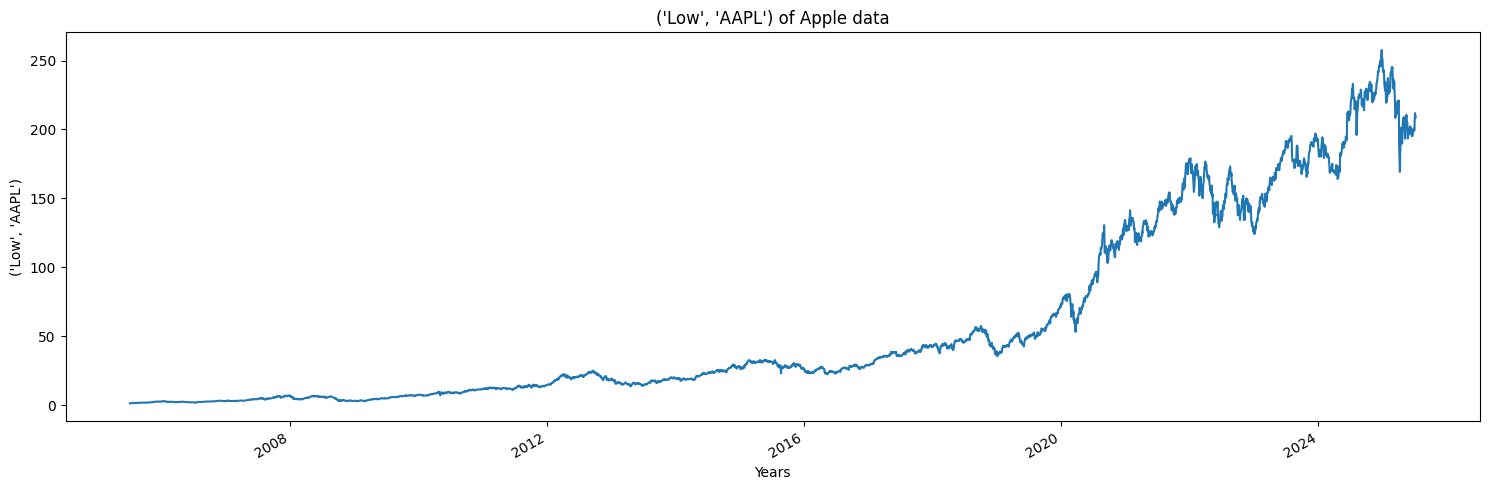

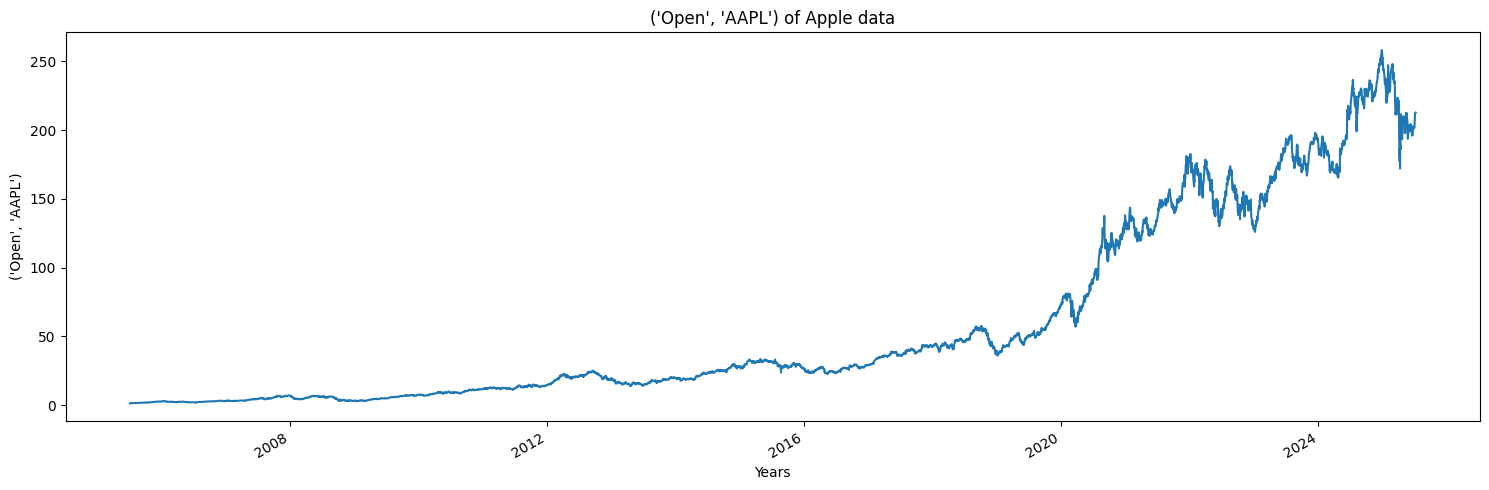

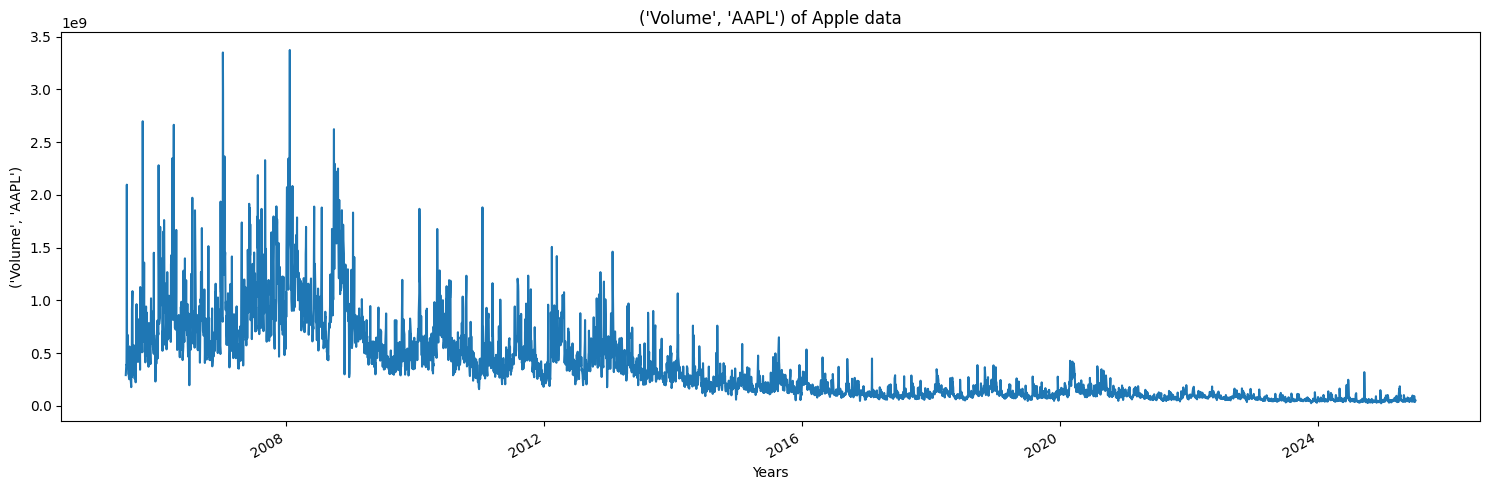

In [110]:
for column in apple_data.columns:
    plot_graph((15, 5), apple_data[column], column)

In [111]:
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()

In [112]:
apple_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-06-28,NaN
2006-06-29,NaN
2006-06-30,NaN
2006-07-03,NaN
2006-07-05,1.836403


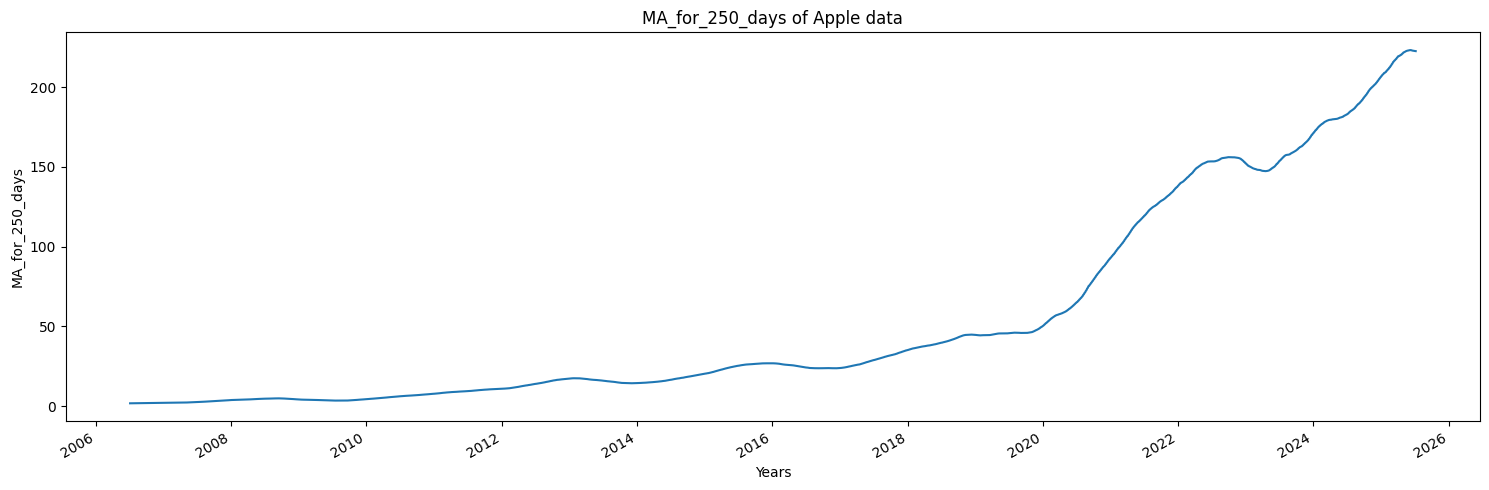

In [113]:
plot_graph((15,5), apple_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

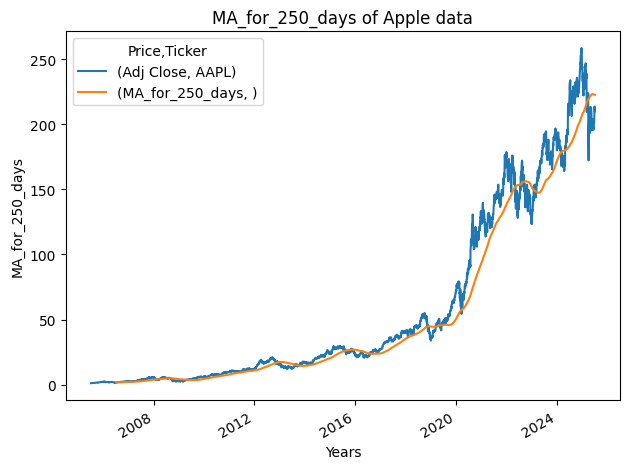

In [114]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

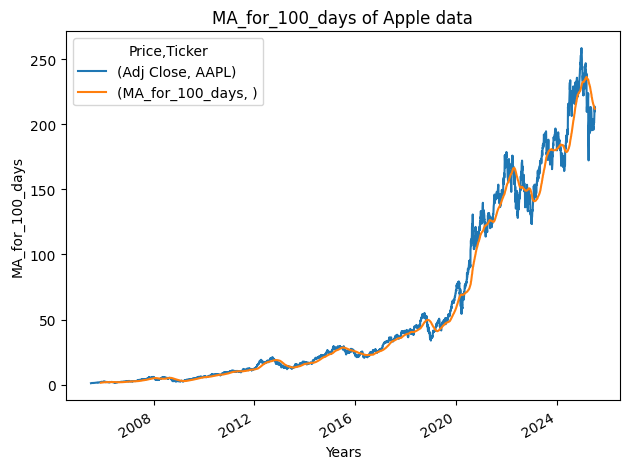

In [115]:
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

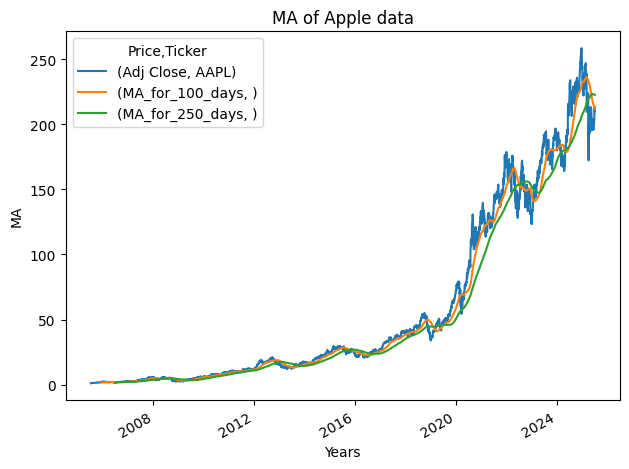

In [118]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [119]:
apple_data['percentage_change_cp'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,AAPL,
Date,,
2005-07-08,1.149572,NaN
2005-07-11,1.145064,-0.003922
2005-07-12,1.149271,0.003674
2005-07-13,1.152579,0.002878
2005-07-14,1.224708,0.062581


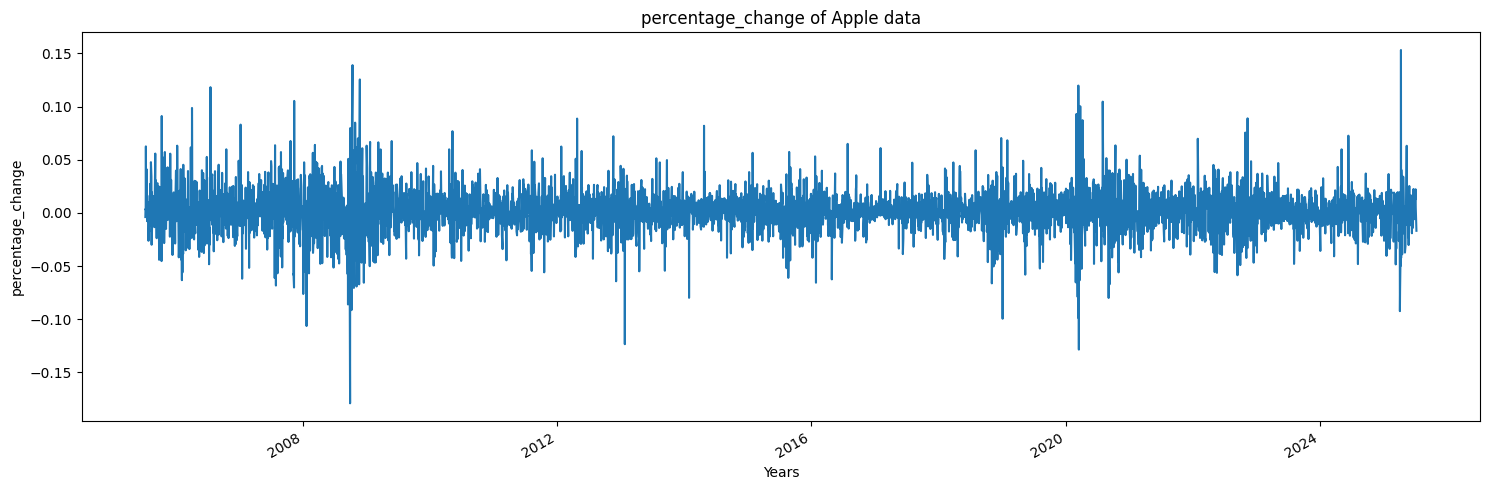

In [120]:
plot_graph((15,5), apple_data['percentage_change_cp'], 'percentage_change')

In [121]:
Adj_close_price = apple_data[['Adj Close']]

In [122]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([258.39666748]), array([1.14506423]))

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.75242356e-05],
       [0.00000000e+00],
       [1.63541614e-05],
       ...,
       [8.21355185e-01],
       [8.25670029e-01],
       [8.11675924e-01]])

In [124]:
len(scaled_data)

5030

In [125]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [126]:
x_data[0],y_data[0]

(array([[1.75242356e-05],
        [0.00000000e+00],
        [1.63541614e-05],
        [2.92106120e-05],
        [3.09595138e-04],
        [4.03058346e-04],
        [3.96049949e-04],
        [5.94657180e-04],
        [6.46059813e-04],
        [6.06337532e-04],
        [6.89287218e-04],
        [6.67089637e-04],
        [6.46059813e-04],
        [6.88117607e-04],
        [6.65920489e-04],
        [5.31568634e-04],
        [5.43251767e-04],
        [5.94657180e-04],
        [5.98159525e-04],
        [5.38578885e-04],
        [5.71289061e-04],
        [5.31568634e-04],
        [6.68257394e-04],
        [6.16854298e-04],
        [6.89287218e-04],
        [9.34625590e-04],
        [1.11921186e-03],
        [9.52149825e-04],
        [1.05729617e-03],
        [9.57989075e-04],
        [9.03082244e-04],
        [9.07752809e-04],
        [8.92565014e-04],
        [8.96070603e-04],
        [9.29951780e-04],
        [8.92565014e-04],
        [9.04250464e-04],
        [9.89534274e-04],
        [1.0

In [127]:
int(len(x_data)*0.7)

3451

In [128]:
5030-100-int(len(x_data)*0.7)

1479

In [129]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [130]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1479, 100, 1)
(1479, 1)


In [131]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [132]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [133]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [134]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 281s 80ms/step - loss: 1.9573e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 321s 80ms/step - loss: 3.1730e-05


In [135]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [136]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [137]:
predictions

array([[0.18123546],
       [0.18203288],
       [0.18435822],
       ...,
       [0.748014  ],
       [0.76089734],
       [0.7702119 ]], dtype=float32)

In [138]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 47.768177],
       [ 47.973312],
       [ 48.57151 ],
       ...,
       [193.57286 ],
       [196.88713 ],
       [199.28331 ]], dtype=float32)

In [139]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 49.77964401],
       [ 50.70773315],
       [ 50.71014023],
       ...,
       [212.44000244],
       [213.55000305],
       [209.94999695]])

In [140]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [141]:
rmse

np.float64(9.134014867372168)

In [144]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = apple_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-08-16,49.779644,47.768177
2019-08-19,50.707733,47.973312
2019-08-20,50.710140,48.571510
2019-08-21,51.259777,49.010807
2019-08-22,51.216385,49.449116


<Figure size 1500x600 with 0 Axes>

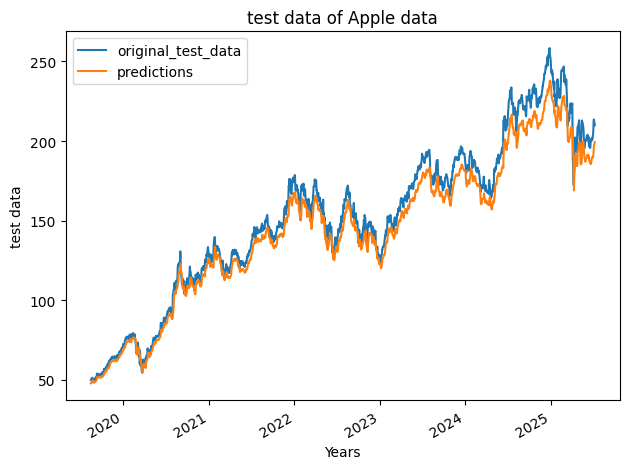

In [145]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

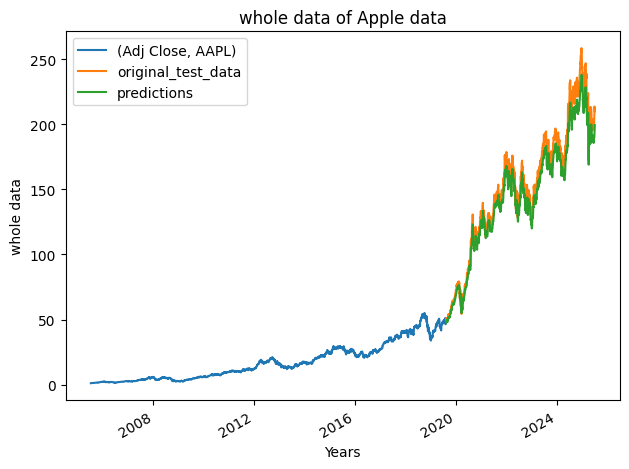

In [147]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [148]:
model.save("Latest_stock_price_model.keras")

In [149]:
from google.colab import files
files.download("Latest_stock_price_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>